In [ ]:
from google.colab import drive
import os
import pandas as pd
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageStat, UnidentifiedImageError

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = '/content/drive/My Drive/dataset'


print(os.listdir(dataset_path))

['sports.csv', 'test', 'train']


In [ ]:

training_path = os.path.join(dataset_path,'train')


all_items = os.listdir(training_path)


folders = [item for item in all_items if os.path.isdir(os.path.join(training_path, item))]


folder_count = len(folders)


print(f"Number of folders in 'training': {folder_count}")

Number of folders in 'training': 100


In [ ]:
validation_path=os.path.join(dataset_path,'valid')


all_items = os.listdir(validation_path)


folders = [item for item in all_items if os.path.isdir(os.path.join(validation_path, item))]


folder_count = len(folders)


print(f"Number of folders in 'validation': {folder_count}")

Number of folders in 'validation': 100


In [ ]:
test_path=os.path.join(dataset_path,'test')


all_items = os.listdir(test_path)
folder_count = len(folders)


print(f"Number of folders in 'test': {folder_count}")

Number of folders in 'test': 100


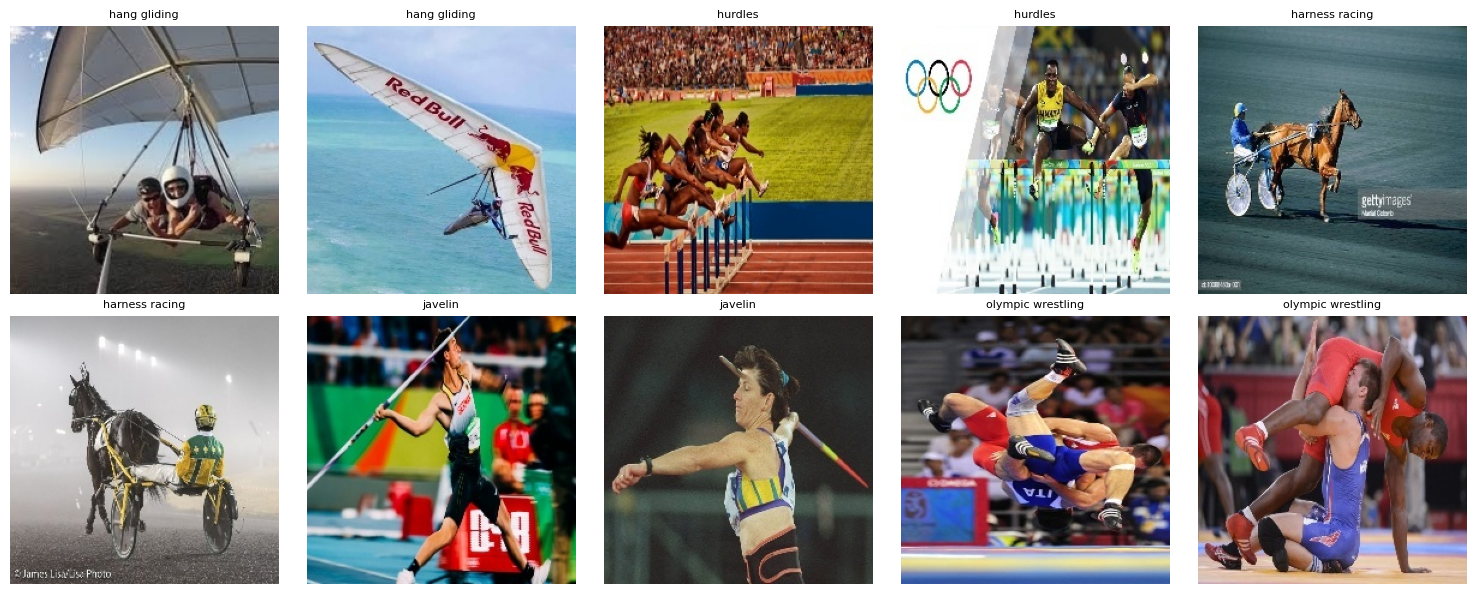

In [ ]:

class_folders = [f for f in os.listdir(training_path) if os.path.isdir(os.path.join(training_path, f))]


sample_classes = random.sample(class_folders, 5)


images_per_class = 2

image_paths = []
class_names = []

for class_folder in sample_classes:
    class_path = os.path.join(training_path, class_folder)


    images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]


    sample_images = random.sample(images, min(images_per_class, len(images)))


    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        image_paths.append(img_path)
        class_names.append(class_folder)


num_images = len(image_paths)
grid_rows = num_images // 5 + (num_images % 5 > 0)

fig, axes = plt.subplots(grid_rows, 5, figsize=(15, grid_rows * 3))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        img = Image.open(image_paths[i])
        ax.imshow(img)
        ax.set_title(class_names[i], fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

class_folders = [f for f in os.listdir(training_path) if os.path.isdir(os.path.join(training_path, f))]


image_counts = {}


image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')

for class_folder in class_folders:
    class_path = os.path.join(training_path, class_folder)


    images = [f for f in os.listdir(class_path) if f.endswith(image_extensions)]


    image_counts[class_folder] = len(images)


for class_name, count in image_counts.items():
    print(f"Class: {class_name} - Number of images: {count}")

Class: wheelchair basketball - Number of images: 106
Class: volleyball - Number of images: 142
Class: water cycling - Number of images: 103
Class: weightlifting - Number of images: 134
Class: wingsuit flying - Number of images: 98
Class: uneven bars - Number of images: 156
Class: ultimate - Number of images: 97
Class: water polo - Number of images: 130
Class: wheelchair racing - Number of images: 119
Class: tug of war - Number of images: 128
Class: tennis - Number of images: 131
Class: swimming - Number of images: 157
Class: speed skating - Number of images: 136
Class: track bicycle - Number of images: 135
Class: trapeze - Number of images: 125
Class: snowmobile racing - Number of images: 147
Class: surfing - Number of images: 142
Class: steer wrestling - Number of images: 122
Class: sumo wrestling - Number of images: 133
Class: table tennis - Number of images: 141
Class: rowing - Number of images: 143
Class: rugby - Number of images: 166
Class: shuffleboard - Number of images: 130
Cla

In [ ]:

image_counts = {}
max_count = 0
min_count = float('inf')
max_class = ''
min_class = ''


for class_name in os.listdir(training_path):
    class_path = os.path.join(training_path, class_name)


    if os.path.isdir(class_path):

        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        current_count = len(image_files)


        image_counts[class_name] = current_count


        if current_count > max_count:
            max_count = current_count
            max_class = class_name

        if current_count < min_count:
            min_count = current_count
            min_class = class_name


average_count = sum(image_counts.values()) / len(image_counts) if image_counts else 0


print(f"Average number of images per class: {average_count:.2f}")
print(f"Class with the highest number of images: '{max_class}' with {max_count} images")
print(f"Class with the lowest number of images: '{min_class}' with {min_count} images")

Average number of images per class: 134.93
Class with the highest number of images: 'football' with 191 images
Class with the lowest number of images: 'sky surfing' with 59 images


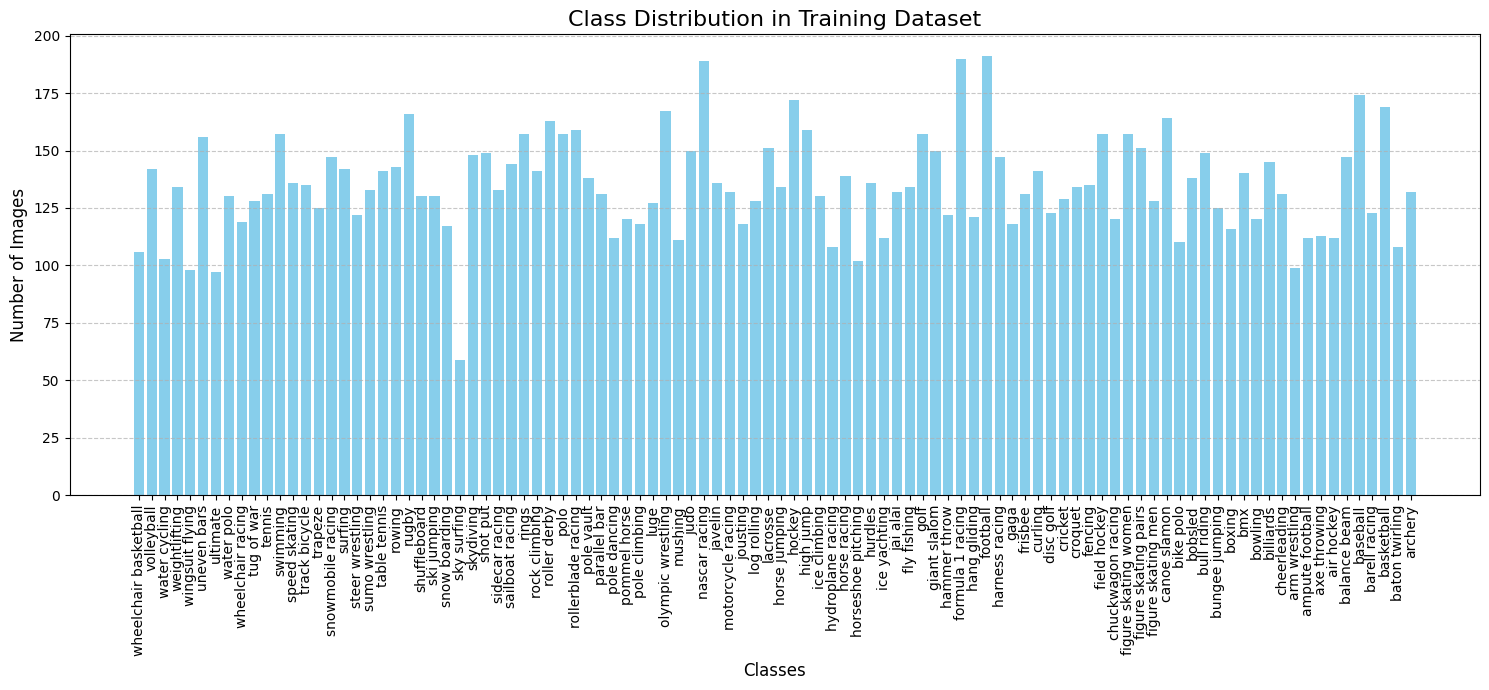

In [ ]:

image_counts = {}


for class_name in os.listdir(training_path):
    class_path = os.path.join(training_path, class_name)

    if os.path.isdir(class_path):

        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        current_count = len(image_files)


        image_counts[class_name] = current_count


classes = list(image_counts.keys())
counts = list(image_counts.values())


plt.figure(figsize=(15, 7))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution in Training Dataset', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [ ]:

image_widths = []
image_heights = []

for class_name in os.listdir(training_path):
    class_path = os.path.join(training_path, class_name)

    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            if os.path.isfile(image_path):
                try:
                    with Image.open(image_path) as img:
                        width, height = img.size
                        image_widths.append(width)
                        image_heights.append(height)
                except Exception as e:
                    print(f"Error processing {image_file}: {e}")


average_width = np.mean(image_widths)
average_height = np.mean(image_heights)


print(f"Average Image Width: {average_width:.2f} pixels")
print(f"Average Image Height: {average_height:.2f} pixels")


Error processing 159.lnk: cannot identify image file '/content/drive/My Drive/dataset/train/high jump/159.lnk'
Average Image Width: 224.00 pixels
Average Image Height: 224.00 pixels


In [ ]:

target_count = 130


def augment_image(image):
    augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.3),
        tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        tf.keras.layers.RandomContrast(factor=0.2),
        tf.keras.layers.RandomBrightness(factor=0.2),
        tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    ])
    return augmentation(image)


def calculate_brightness(image_path):
    try:
        img = Image.open(image_path).convert('L')
        stat = ImageStat.Stat(img)
        brightness = stat.mean[0]
        return brightness
    except UnidentifiedImageError:
        print(f"UnidentifiedImageError: Cannot process file {image_path}. Skipping.")
        return None


for class_name in os.listdir(training_path):
    class_path = os.path.join(training_path, class_name)

    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        current_count = len(images)

        if current_count == target_count:
            print(f"Class {class_name} already has exactly {target_count} images, skipping...")
            continue


        elif current_count > target_count:
            print(f"Processing class {class_name}, current count: {current_count}, trimming to {target_count}")


            image_brightness = []
            for image_file in images:
                image_path = os.path.join(class_path, image_file)
                brightness = calculate_brightness(image_path)
                if brightness is not None:
                    image_brightness.append((image_file, brightness))


            image_brightness.sort(key=lambda x: x[1])


            images_to_keep = [img[0] for img in image_brightness[:target_count]]
            images_to_remove = [img[0] for img in image_brightness[target_count:]]


            for img in images_to_remove:
                image_path = os.path.join(class_path, img)
                try:
                    os.remove(image_path)
                    print(f"Removed: {img}")
                except Exception as e:
                    print(f"Error removing {img}: {e}")


        elif current_count < target_count:
            print(f"Augmenting class {class_name}, current count: {current_count}, augmenting to {target_count}")

            image_paths = [os.path.join(class_path, img) for img in images]
            for i in range(current_count, target_count):
                img_path = image_paths[i % current_count]

                try:

                    img = tf.keras.preprocessing.image.load_img(img_path)
                    img = tf.keras.preprocessing.image.img_to_array(img)
                    img = tf.expand_dims(img, 0)


                    augmented_img = augment_image(img)
                    augmented_img = tf.squeeze(augmented_img, axis=0)
                    augmented_img = tf.keras.preprocessing.image.array_to_img(augmented_img)


                    augmented_img.save(os.path.join(class_path, f"augmented_{i}.jpg"))
                    print(f"Augmented and saved: augmented_{i}.jpg")
                except UnidentifiedImageError:
                    print(f"UnidentifiedImageError: Cannot process file {img_path}. Skipping.")
                    continue
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")
                    continue

print("Dataset balancing complete.")


Augmenting class wheelchair basketball, current count: 106, augmenting to 130
Augmented and saved: augmented_106.jpg
Augmented and saved: augmented_107.jpg
Augmented and saved: augmented_108.jpg
Augmented and saved: augmented_109.jpg
Augmented and saved: augmented_110.jpg
Augmented and saved: augmented_111.jpg
Augmented and saved: augmented_112.jpg
Augmented and saved: augmented_113.jpg
Augmented and saved: augmented_114.jpg
Augmented and saved: augmented_115.jpg
Augmented and saved: augmented_116.jpg
Augmented and saved: augmented_117.jpg
Augmented and saved: augmented_118.jpg
Augmented and saved: augmented_119.jpg
Augmented and saved: augmented_120.jpg
Augmented and saved: augmented_121.jpg
Augmented and saved: augmented_122.jpg
Augmented and saved: augmented_123.jpg
Augmented and saved: augmented_124.jpg
Augmented and saved: augmented_125.jpg
Augmented and saved: augmented_126.jpg
Augmented and saved: augmented_127.jpg
Augmented and saved: augmented_128.jpg
Augmented and saved: augm

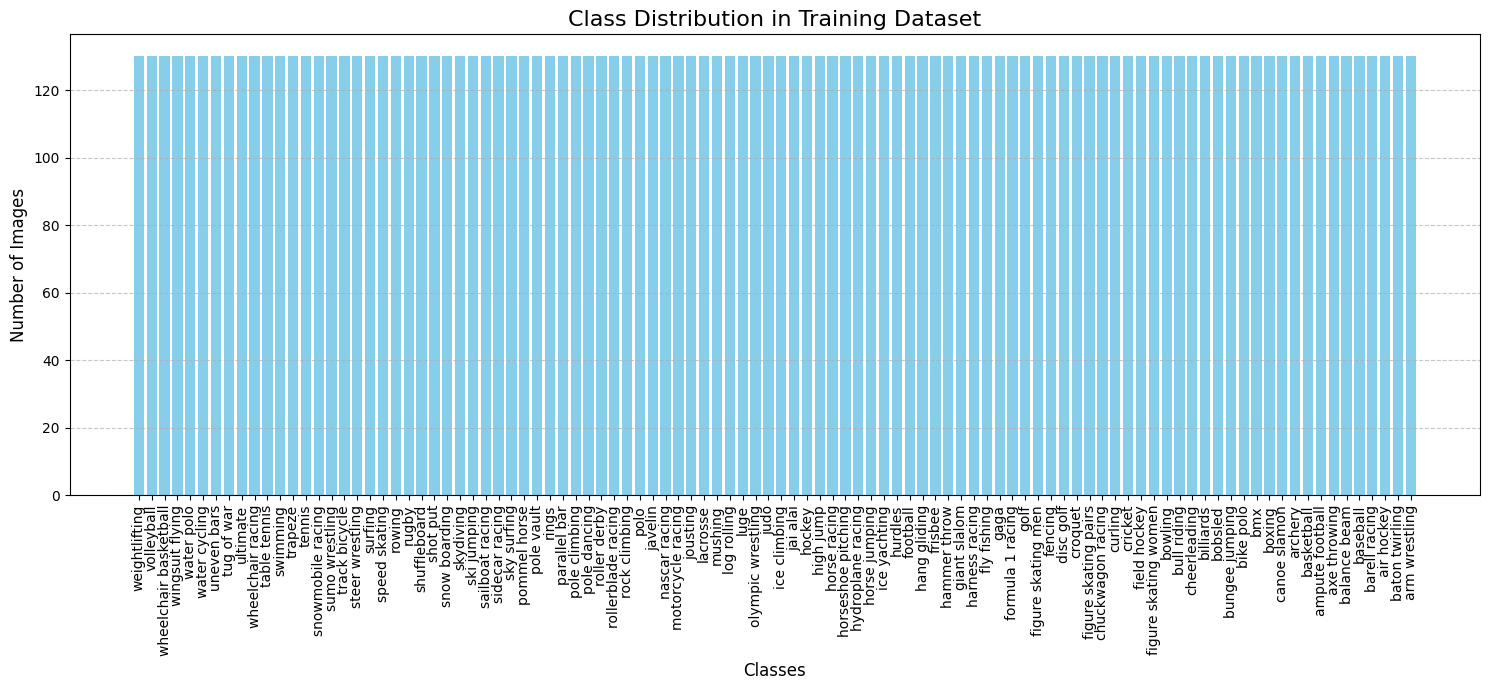

In [ ]:

image_counts = {}


for class_name in os.listdir(training_path):
    class_path = os.path.join(training_path, class_name)

    if os.path.isdir(class_path):

        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        current_count = len(image_files)


        image_counts[class_name] = current_count


classes = list(image_counts.keys())
counts = list(image_counts.values())


plt.figure(figsize=(15, 7))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution in Training Dataset', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

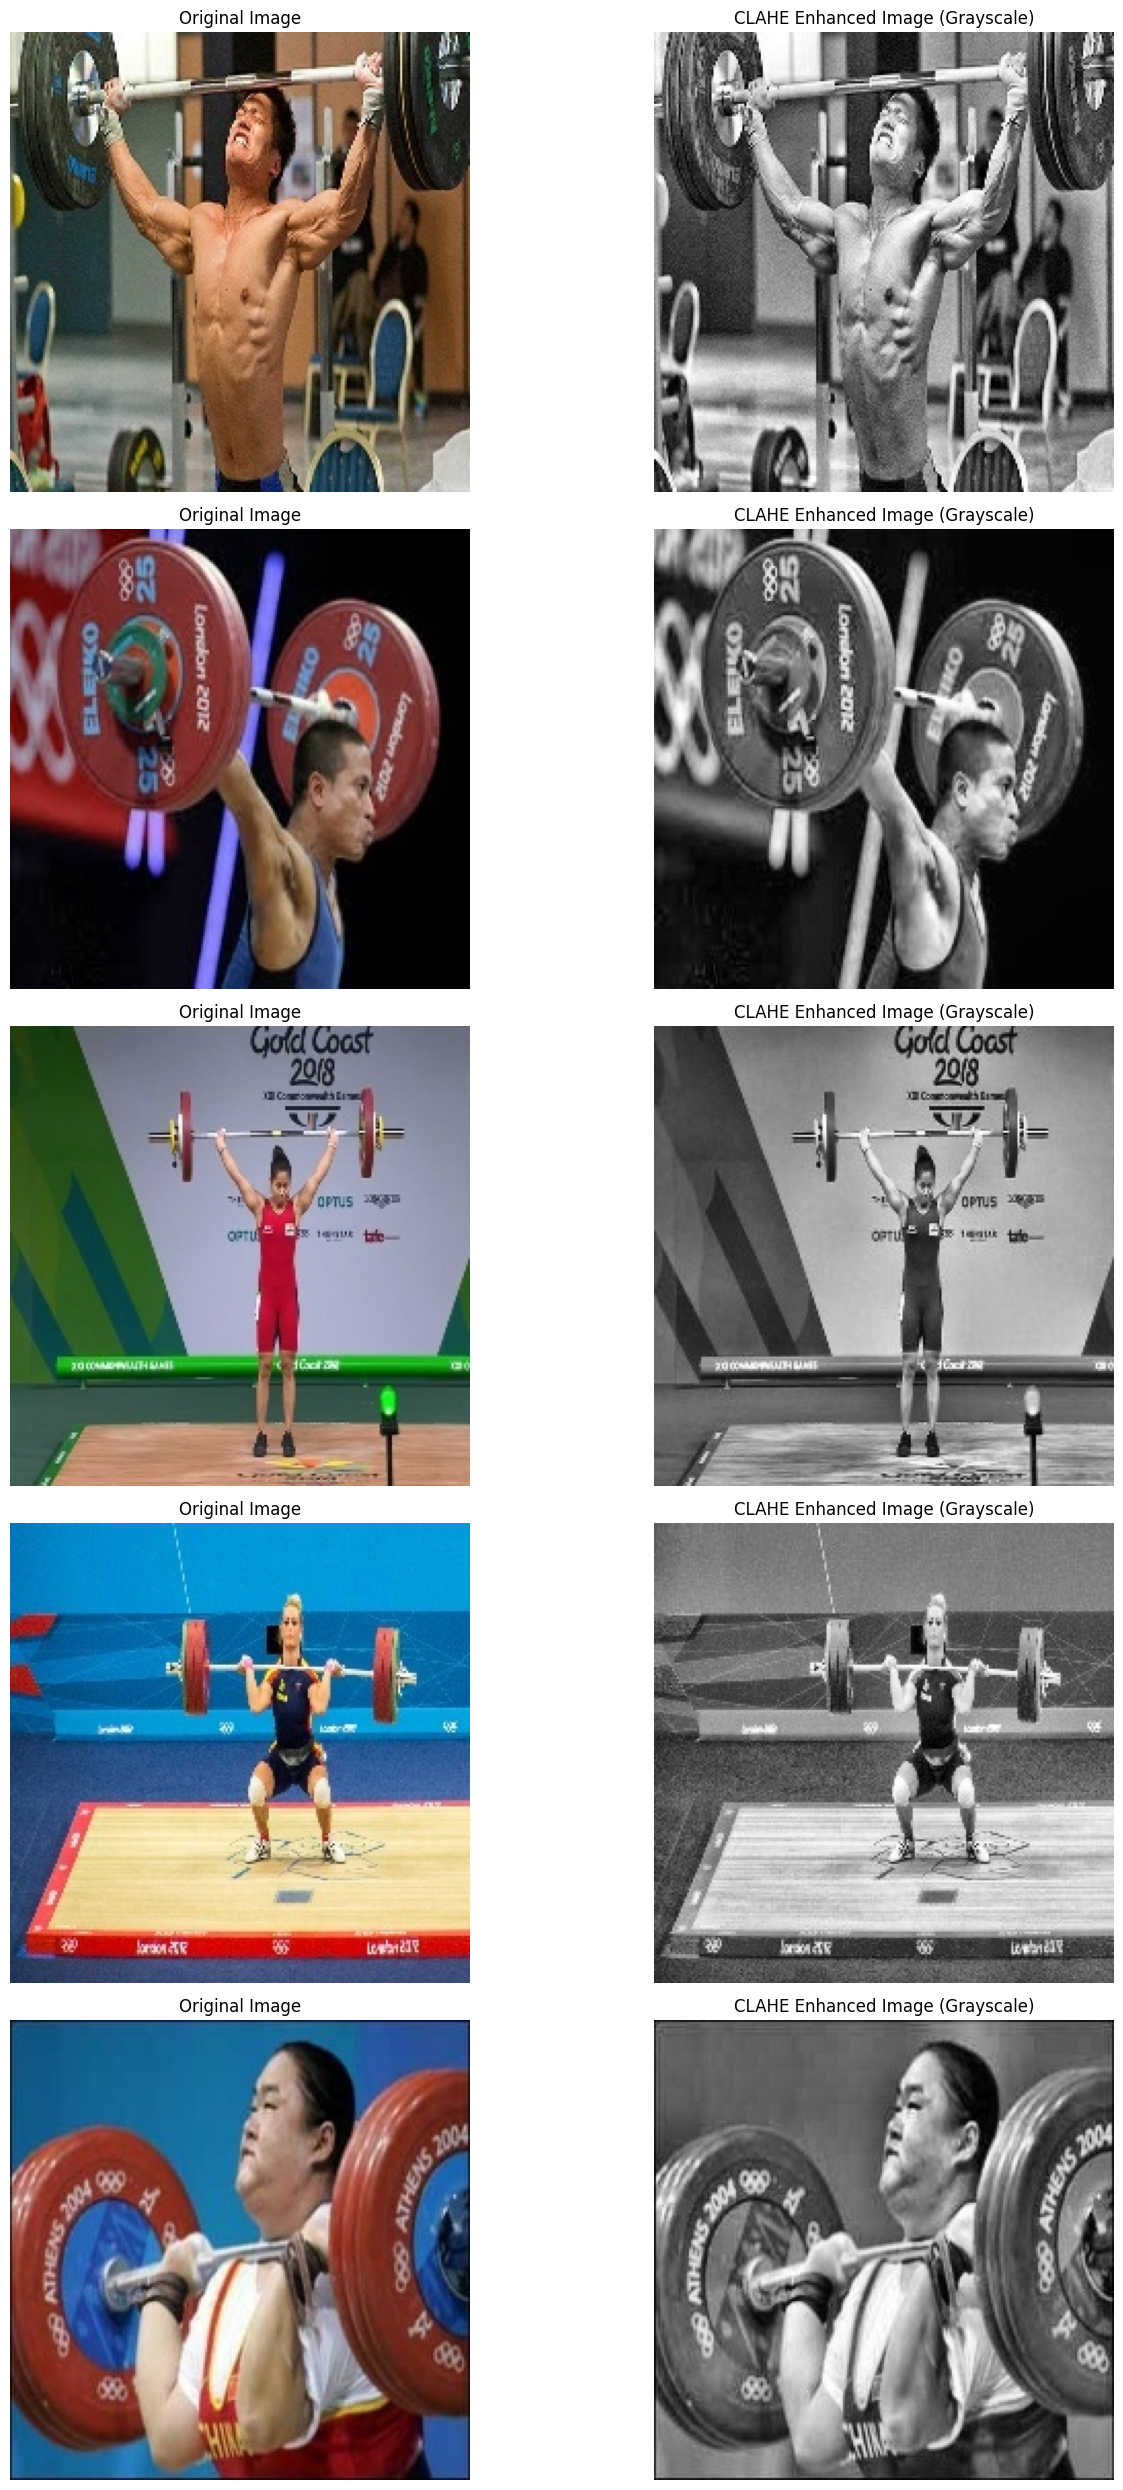

In [ ]:
#Just for preview
import cv2


def apply_clahe(image):
    #grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    return enhanced_img

def preview_images_with_clahe(training_path, sample_size=5):
    sample_images = []

    for class_name in os.listdir(training_path):
        class_path = os.path.join(training_path, class_name)

        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

            # sample
            for img_name in image_files[:sample_size]:
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)

                if img is not None:
                    enhanced_img = apply_clahe(img)
                    sample_images.append((img, enhanced_img))


    num_samples = min(len(sample_images), sample_size)


    plt.figure(figsize=(15, 5 * num_samples))

    for i in range(num_samples):
        original, enhanced = sample_images[i]

        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(enhanced, cmap='gray')  # Display
        plt.title("CLAHE Enhanced Image (Grayscale)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


preview_images_with_clahe(training_path, sample_size=5)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir = training_path
val_dir = validation_path

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 13000 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [ ]:
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

#Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(100, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#summary
model.summary()
#Diagram of the model shown below,,it has 3 blocks of convolution layer consists of 1 conv layer and one max pool layer
#Then flatten layer flatten the output of convolution block and feeds them into fully connected layer which is followed by a output layer.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,270,372 (84.95 MB)

 Trainable params: 22,270,372 (84.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"Total training samples: {train_data.samples}")

Total training samples: 13000


In [ ]:
print(f"Total validation samples: {val_data.samples}")

Total validation samples: 500


In [ ]:
class AccuracyPercentageCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy') * 100
        val_acc = logs.get('val_accuracy') * 100
        print(f"\nEpoch {epoch+1}: Accuracy: {acc:.2f}% - Validation Accuracy: {val_acc:.2f}%")


history = model.fit(
    train_data,

    steps_per_epoch=400,
    epochs=15,
    validation_data=val_data,

    validation_steps=15,
    callbacks=[AccuracyPercentageCallback()]
)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3491 - loss: 2.6329
Epoch 1: Accuracy: 34.84% - Validation Accuracy: 36.04%
400/400 ━━━━━━━━━━━━━━━━━━━━ 1702s 4s/step - accuracy: 0.3491 - loss: 2.6329 - val_accuracy: 0.3604 - val_loss: 2.6312
Epoch 2/15
  7/400 ━━━━━━━━━━━━━━━━━━━━ 25:20 4s/step - accuracy: 0.3380 - loss: 2.4022

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: Accuracy: 33.93% - Validation Accuracy: 15.00%
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.3393 - loss: 2.4773 - val_accuracy: 0.1500 - val_loss: 3.0535
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5198 - loss: 1.8445
Epoch 3: Accuracy: 51.60% - Validation Accuracy: 38.12%
400/400 ━━━━━━━━━━━━━━━━━━━━ 1706s 4s/step - accuracy: 0.5198 - loss: 1.8445 - val_accuracy: 0.3812 - val_loss: 2.5940
Epoch 4/15
  7/400 ━━━━━━━━━━━━━━━━━━━━ 27:13 4s/step - accuracy: 0.5425 - loss: 1.8264
Epoch 4: Accuracy: 53.12% - Validation Accuracy: 30.00%
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 64ms/step - accuracy: 0.5314 - loss: 1.8682 - val_accuracy: 0.3000 - val_loss: 2.9110
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6782 - loss: 1.1796
Epoch 5: Accuracy: 66.70% - Validation Accuracy: 33.33%
400/400 ━━━━━━━━━━━━━━━━━━━━ 1751s 4s/step - accuracy: 0.6782 - loss: 1.1797 - val_accuracy: 0.3333 - val_loss: 3.0006
Epoch 6/15
  7/400 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
model.save('sports_imageDetector_model.h5')

In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}")

train_loss, train_acc = model.evaluate(train_data)
print(f"Training Loss: {train_loss:.4f} - Training Accuracy: {train_acc:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3616 - loss: 3.5502
Validation Loss: 3.8112 - Validation Accuracy: 0.3380
407/407 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.9989 - loss: 0.0113
Training Loss: 0.0102 - Training Accuracy: 0.9992


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('sports_imageDetector_model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 500 images belonging to 100 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_data)


print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 152s 10s/step - accuracy: 0.3615 - loss: 3.5839
Test Loss: 3.5109 - Test Accuracy: 0.3600


The model is not equally performing good in all classe.It has gained 99.89%  training accuracy while having loss of  0.0113 but validation accuracy is only about 36.16% with loss 3.5502 and the test accuracy is 36.00% with loss 3.59%
* Validation and test loss too much and we can say that model is overfitting
  Reasons can be noisy images,some sports having identical actions,not too complex model structure
* The current dropout and regularization techniques may not be sufficient to prevent overfitting. More advanced techniques like weight decay or increasing dropout could help.
*  By adjusting some hyperparameters and deleting the noisy images results can be improved








In [ ]:
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
true_labels = test_data.classes


predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

class_labels = list(test_data.class_indices.keys())


report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
                       precision    recall  f1-score   support

           air hockey       0.50      0.60      0.55         5
      ampute football       0.12      0.20      0.15         5
              archery       0.20      0.20      0.20         5
        arm wrestling       1.00      0.20      0.33         5
         axe throwing       0.00      0.00      0.00         5
         balance beam       0.40      0.40      0.40         5
        barell racing       0.67      0.40      0.50         5
             baseball       0.25      0.20      0.22         5
           basketball       0.00      0.00      0.00         5
       baton twirling       0.67      0.40      0.50         5
            bike polo       0.14      0.20      0.17         5
            billiards       0.67      0.80      0.73         5
                  bmx       0.18      0.40      0.25         5
              bobsled       0.22      0.40      0.29         5
              b

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step


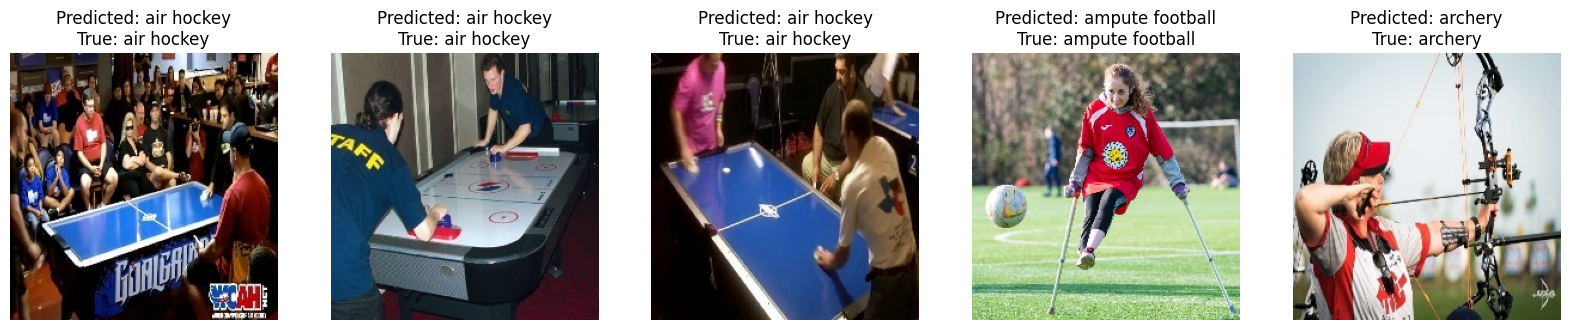

In [ ]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_data.classes
class_labels = list(test_data.class_indices.keys())


correct_indices = np.where(predicted_labels == true_labels)[0]


num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i, ax in enumerate(axes):
    idx = correct_indices[i]
    img_path = test_data.filepaths[idx]
    img = plt.imread(img_path)
    label = true_labels[idx]

    ax.imshow(img)
    ax.set_title(f"Predicted: {class_labels[predicted_labels[idx]]}\nTrue: {class_labels[label]}")
    ax.axis('off')

plt.show()

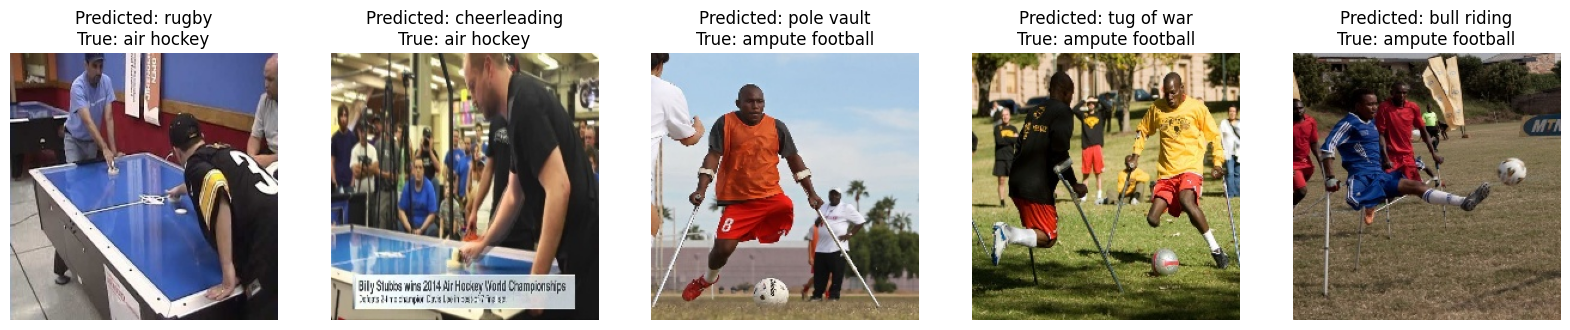

In [ ]:
badindices = np.where(predicted_labels != true_labels)[0]


num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i, ax in enumerate(axes):
    idx = badindices[i]
    img_path = test_data.filepaths[idx]
    img = plt.imread(img_path)
    predicted_label = predicted_labels[idx]
    true_label = true_labels[idx]

    ax.imshow(img)
    ax.set_title(f"Predicted: {class_labels[predicted_label]}\nTrue: {class_labels[true_label]}")
    ax.axis('off')

plt.show()

**Bad Test Example & Why Performing Badly**
* One reason could be the image quality. We found that most of the images in this dataset are noisy.
* Another reason might be the complexity of the model. We built a simple CNN model with only three convolutional blocks, and this simplicity may have contributed to poor test performance.

* One observation from the bad test examples is that the actual sports and the falsely predicted sports share similar features or actions. A more efficient model and robust training are needed to improve performance

*  Among the 100 sports, some sports have noticeably similar actions, which could lead to misclassification.
  








16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3615 - loss: 3.5839


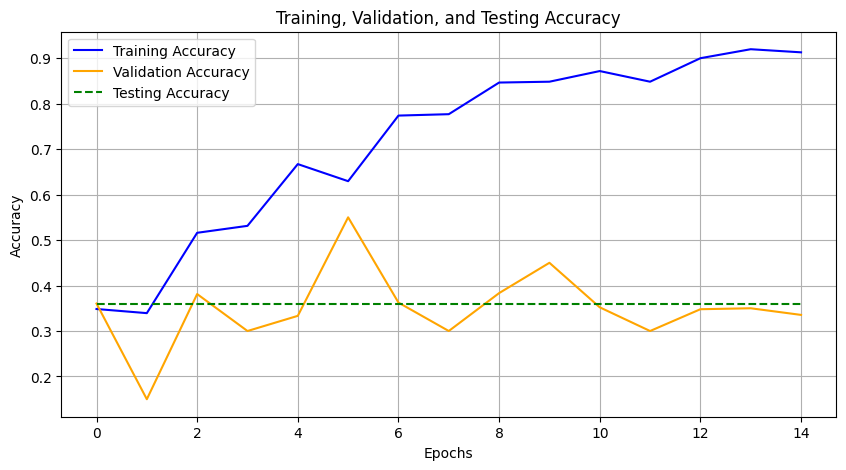

In [ ]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

test_loss, test_accuracy = model.evaluate(test_data)
test_accuracy = [test_accuracy] * len(train_accuracy)


plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.plot(test_accuracy, label='Testing Accuracy', color='green', linestyle='--')
plt.title('Training, Validation, and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()